# Growth Modes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [2]:
URL = 'https://raw.githubusercontent.com/PacktPublishing/Forecasting-Time-Series-Data-with-Facebook-Prophet/main/data/divvy_daily.csv'
df = pd.read_csv(URL)
df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

In [4]:
model = Prophet(growth='linear', seasonality_mode='multiplicative', yearly_seasonality=4)
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -151.729


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      81       2713.43   0.000947721       208.954   1.023e-05       0.001      151  LS failed, Hessian reset 
      99       2714.49   0.000871608       65.5509      0.4647      0.4647      171   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141       2715.54    0.00113776       271.667   1.057e-05       0.001      275  LS failed, Hessian reset 
     199       2716.32   2.23266e-07       77.7627      0.5169      0.5169      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     214       2716.32   2.38135e-06       85.0662   3.088e-08       0.001      403  LS failed, Hessian reset 
     222       2716.32   1.63079e-07        78.506      0.2943      0.9709      413   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [6]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

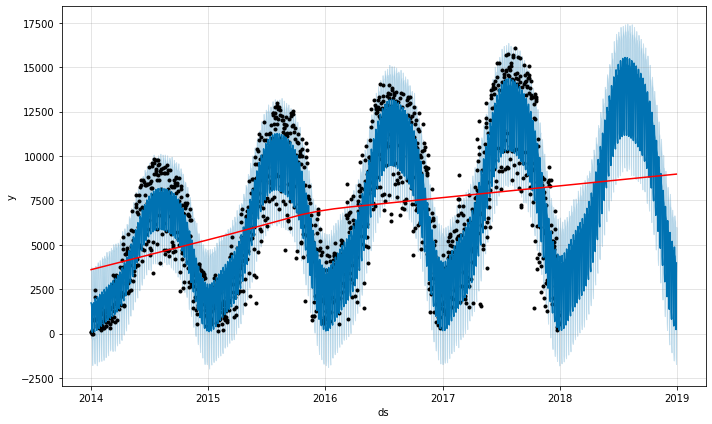

In [8]:
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast, cp_linestyle='')
plt.show()

# The logistic function


$$
y=\frac{L}{1+e^{-k(x-x_{0})}}
$$

Here, L is the maximum value of the curve, k is the logistic growth rate, or steepness, of 
the curve, and x0 is the x-value of the curve's midpoint.

The equation was developed by Pierre François Verhulst, a Belgian mathematician, in 
a series of three papers published between 1838 and 1847. Verhulst was working to model 
the population growth of Belgium. 

Population growth approximately follows an initial exponential growth rate, then 
a linear, also known as arithmetic, growth rate, until the population hits a saturation point, 
where growth slows to zero. This is the shape you see in the preceding plot, starting at the 
curve's midpoint and moving right. Verhulst invented the term logistic to be analogous to 
arithmetic and geometric but derived from logarithmic. Don't get the word confused with 
logistics, as referring to the handling of details. They have completely different origins. 